# End User Experience & Adoption Projects on Open Source Observer

###  RPGF3 List ✨

In [1]:
from collections import defaultdict
from datetime import datetime, timedelta, timezone
import json
import numpy as np
import pandas as pd

from scripts.eas_lists import listify, create_eas_json

# Prep

In [2]:
# settings

DATA_DIR  = "data/RPGF3/"
DATA_PATH = DATA_DIR + "2023-11-13_RPGF3_snapshot.csv"

LIST_DESC = "OSS projects with direct impact on user growth across the Superchain."
LINK_BASE = "https://github.com/opensource-observer/insights/blob/main/notebooks/"
FILENAME  = "2023-11-13_RPGF3_EndUserExperience.ipynb"
LIST_LINK = LINK_BASE + FILENAME

LIST_EVAL = " ".join([
                "This list awards 50K OP tokens to any *active* RPGF3 project in the 'End User Experience & Adoption'",
                "category that is represented on https://opensource.observer. Only projects with unique,",
                "public GitHub repos included in their application have been indexed by OSO.",
                "It also awards a token bonus to projects based on the number of monthly active users they have",
                "on OP Mainnet: 10K tokens for 10-100 MAUs, 20K for 100-1000, 30K for 1000-10,000, and so on.", 
                "If a contract address was not included as a link in a project's RPGF3 application, then it",
                "most likely won't be included here. Finally, projects targeting end users on Base, Farcaster,",
                "and Zora networks also receive a 10K OP bonus.",
                "Note: lists generated by the OSO team do not include OSO in them in order to comply",
                "with voting rules, so please consider adding our project to your ballot separately. Always DYOR!"
                ]) 

LIST_CATS = [
            #'COLLECTIVE_GOVERNANCE',
            #'DEVELOPER_ECOSYSTEM', 
            'END_USER_EXPERIENCE_AND_ADOPTION', 
            #'OP_STACK'
            ]

JSON_PATH = DATA_DIR + "lists/OSO_EndUserExperience.json"

In [3]:
# ingest data

df = pd.read_csv(DATA_PATH)
df = df[df['Category: End User Experience and Adoption'] == 1]
cols = ['Project ID', 'Project Name', 'OSO Slug', 'Contributors Last 6 Months', 'Onchain Users Last 6 Months', 
        'Keywords: Base', 'Keywords: Farcaster', 'Keywords: Zora']
df = df[cols]

len(df)

472

# Get the data to power the list

In [4]:
# run analysis

def scorer(row):
    score = 0
    if not isinstance(row['OSO Slug'], str):
        return 0
    
    if not np.isnan(row['Contributors Last 6 Months']):
        score += 50000
        
    maus = row['Onchain Users Last 6 Months']
    if not np.isnan(maus) and maus > 0:
        user_magnitude = int(np.log10(maus))
        score += 10000 * user_magnitude
    
    if row[['Keywords: Base', 'Keywords: Farcaster', 'Keywords: Zora']].sum() > 0:
        score += 10000
    
    return score
        
scores = []
for _,row in df.iterrows():
    scores.append(scorer(row))

In [5]:
# transform the results

scores_to_projects = dict(zip(df['OSO Slug'], scores))
slugs_to_ids = dict(zip(df['OSO Slug'], df['Project ID']))

# Generate the list data

In [6]:
award_amt = sum(scores_to_projects.values())
award_amt

11610000

In [7]:
named_list = listify(scores_to_projects, award_amt)
rpgf_list = {slugs_to_ids[k]:v for k,v in named_list.items()}

197


<AxesSubplot:>

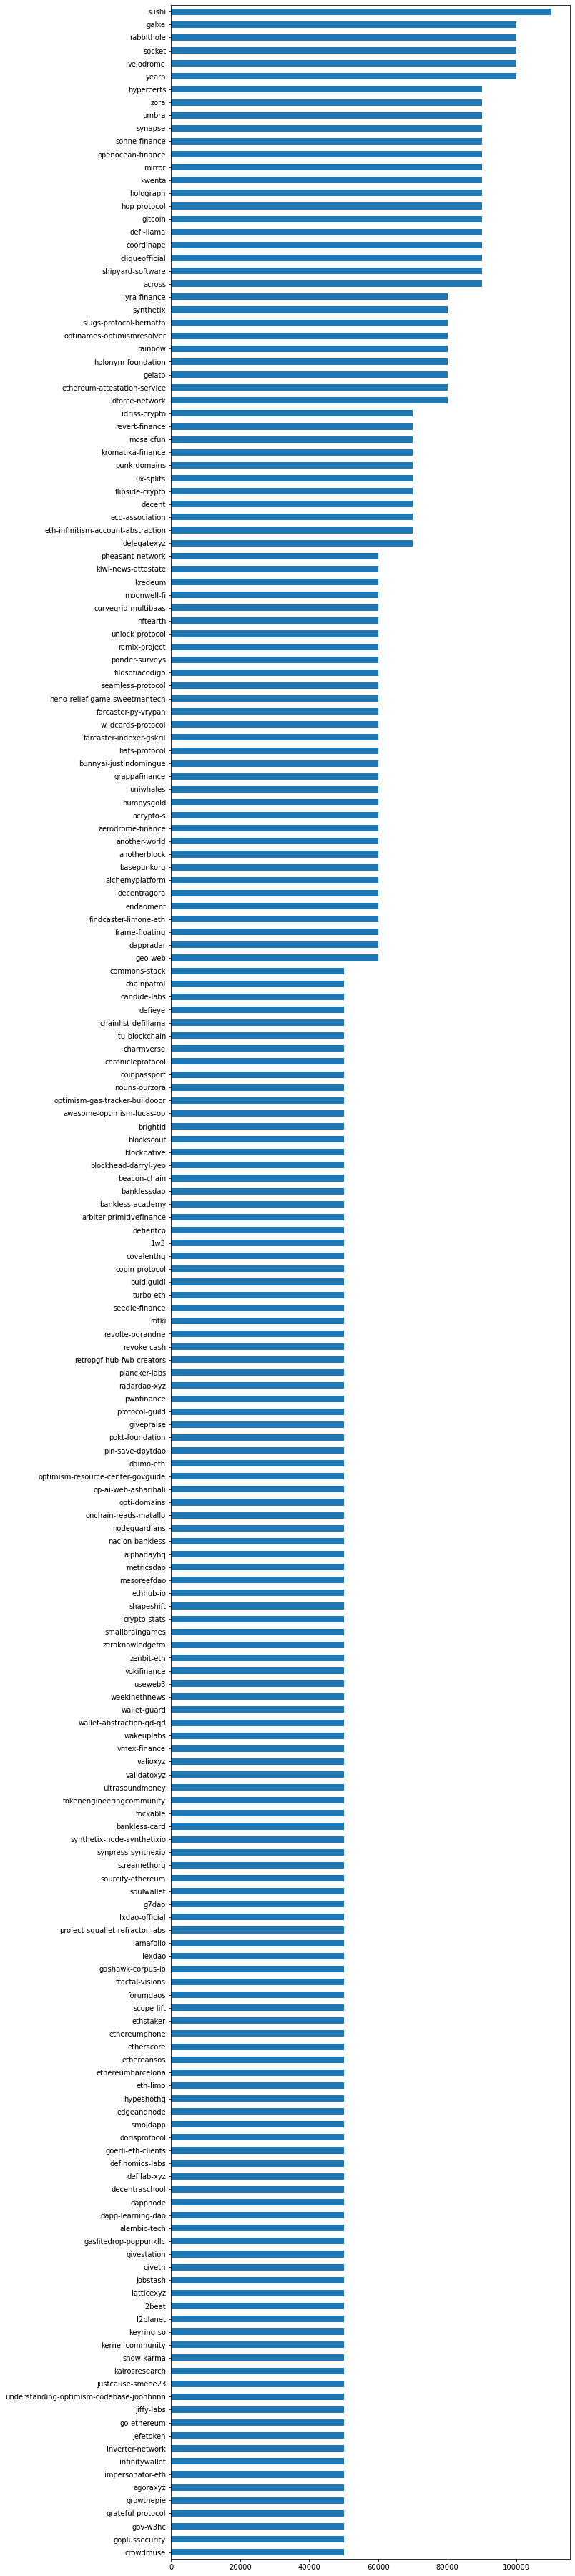

In [8]:
series = pd.Series(named_list).sort_values()
series = series[series>0]
print(len(series))
series.plot(kind='barh', figsize=(10,len(rpgf_list)/3))

In [9]:
eas_metadata = create_eas_json(rpgf_list, LIST_DESC, LIST_LINK, LIST_EVAL, LIST_CATS)

In [10]:
with open(JSON_PATH, "w") as f:
    json.dump(eas_metadata, f, indent=4)